**Description**:  
Notebook for the evaluation of the scoring results for 199 READMEs which are created by LLama 3.1 8B  
**Dependencies**:  
 + preprocessing/05_counts.ipynb
 + data/df_repos_counts_filtered.json

*Hint: If lines are created with support of a Large Language Model or the code is taken from another source, you find following hint at the end of the line: (generated with Microsoft Copilot) or (source: link_to_source)*

In [129]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
import numpy as np
from scipy.stats import mode
import seaborn as sns
import numpy as np

### Universal Functions

In [2]:
def exclude_repos(df):
    '''
    During the process there are some repositories found which can not be used because of inconsistence in the data. These repository data will be filterd out.  
        - diego-vicente: som-tsp --> GitHub repository has no README file
        - Taniiishk: Rock-Paper-Scissors-Game --> GitHub repository has no license
    '''
    repos_exclude = [('diego-vicente', 'som-tsp'), ('Taniiishk', 'Rock-Paper-Scissors-Game')]
    # ('langchain', 'ai_local-deep-researcher_output')
    df = df[~df.set_index(['repo_owner', 'repo_name']).index.isin(repos_exclude)] 

    return df

In [3]:
def remove_cols(df):
    df = df.drop(['readme_g_score', 'readme_g_score_q1_txt', 'readme_g_score_q2_txt', 'readme_g_score_q3_txt', 'readme_g_score_q4_txt', 'readme_g_score_q5_txt', 'readme_o_score', 'readme_o_score_q1_txt', 'readme_o_score_q2_txt', 'readme_o_score_q3_txt', 'readme_o_score_q4_txt', 'readme_o_score_q5_txt'], axis=1)

    return df

In [ ]:
# 
def load_data(path):
    with open(path, 'r') as f:
        loaded_data = json.load(f)

    df = pd.DataFrame(data=loaded_data)

    return df

In [5]:
def change_order(df, df_order):
    df = df.set_index('id').reindex(df_order['id']).reset_index()

    return df

In [6]:
def add_id_col(df):
    df['id'] = df['repo_owner'] + '_' + df['repo_name']

    return df

# Dataframe df_llama  
This dataframe gives an overview of the evaluation results from the original and genearted READMES (generated by llama3.1-8b). The scoring was created with three different kind of llms - llama3.1-8b, reka-flash & jamba-1.5-mini.

### Order of GitHub repositories

In [7]:
order_data = load_data(path='../data/df_repos_counts_filtered.json') # load json with filtered repository
df_order = pd.DataFrame(order_data) 

In [8]:
df_order = exclude_repos(df_order)
df_order = add_id_col(df_order)

In [9]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 200
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   repo_owner                    199 non-null    object
 1   repo_name                     199 non-null    object
 2   source_code_comments          199 non-null    int64 
 3   source_code                   199 non-null    int64 
 4   source_code_cleaned_comments  199 non-null    int64 
 5   source_code_cleaned           199 non-null    int64 
 6   comments                      199 non-null    int64 
 7   formatting                    199 non-null    int64 
 8   sum                           199 non-null    int64 
 9   id                            199 non-null    object
dtypes: int64(7), object(3)
memory usage: 17.1+ KB


## Model 1

In [10]:
model = 'model1'
path = f'../data/df_score_lama/df_score_{model}_manuel.json'
df_1 = load_data(path)

In [11]:
len(df_1)

201

In [12]:
df_1.head(2)

,repo_owner,repo_name,readme_g_score,readme_g_score_q1,readme_g_score_q1_txt,readme_g_score_q2,readme_g_score_q2_txt,readme_g_score_q3,readme_g_score_q3_txt,readme_g_score_q4,...,readme_o_score_q1,readme_o_score_q1_txt,readme_o_score_q2,readme_o_score_q2_txt,readme_o_score_q3,readme_o_score_q3_txt,readme_o_score_q4,readme_o_score_q4_txt,readme_o_score_q5,readme_o_score_q5_txt
0,keras-rl,keras-rl,"### ""q1"": [\n ##""score"": 5##,\n ##""expla...",5,The README clearly states that the project is ...,5,The README clearly explains that the project i...,4,The README provides a clear example code to ge...,2,...,5,The goal of the project is clearly stated in t...,5,The project is useful because it provides a se...,4,The README provides a clear installation guide...,5,The README provides several ways for users to ...,5,The README clearly states that the project is ...
1,terraform-compliance,cli,"### ""q1"": [ \n ##""score"": 5##,\n ##""expl...",5,"The project's goal is clearly stated in the ""D...",5,The project is useful because it provides a BD...,4,The README provides a clear step-by-step guide...,2,...,5,The goal of the project is clearly stated in t...,5,The README clearly explains why the project is...,4,The README provides a clear installation guide...,5,The README provides several ways for users to ...,5,The README clearly states that the project is ...


In [13]:
df_1 = exclude_repos(df_1)
df_1 = add_id_col(df_1)


In [14]:
df_1 = change_order(df_1, df_order)

In [15]:
len(df_1)

199

For the final dataframe not all columns are required. Dispensable columns are removed to keep the dataframe clean.

In [16]:
df_1 = remove_cols(df_1)

In [17]:
df_1.describe()

,readme_g_score_q1,readme_g_score_q2,readme_g_score_q3,readme_g_score_q4,readme_g_score_q5,readme_o_score_q1,readme_o_score_q2,readme_o_score_q3,readme_o_score_q4,readme_o_score_q5
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,4.542714,4.577889,4.316583,2.135678,2.266332,4.693467,4.743719,4.296482,4.221106,4.311558
std,0.686769,0.740402,0.581948,0.701142,0.950503,0.798678,0.703274,0.743686,1.133225,1.264678
min,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,2.000000,2.000000,5.000000,5.000000,4.000000,4.000000,4.000000
50%,5.000000,5.000000,4.000000,2.000000,2.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,2.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Model 2

In [18]:
model = 'model2'
path = f'../data/df_score_lama/df_score_{model}_manuel.json'
df_2 = load_data(path)

In [19]:
len(df_2)

201

In [20]:
df_2.head(2)

,repo_owner,repo_name,readme_g_score,readme_g_score_q1,readme_g_score_q1_txt,readme_g_score_q2,readme_g_score_q2_txt,readme_g_score_q3,readme_g_score_q3_txt,readme_g_score_q4,...,readme_o_score_q1,readme_o_score_q1_txt,readme_o_score_q2,readme_o_score_q2_txt,readme_o_score_q3,readme_o_score_q3_txt,readme_o_score_q4,readme_o_score_q4_txt,readme_o_score_q5,readme_o_score_q5_txt
0,keras-rl,keras-rl,"###\n""q1"": [\n ""score"": 4,\n ""explanati...",4,The README clearly states the goal of the proj...,3,The usefulness of the project is hinted at by ...,4,The README offers a clear guide on how to get ...,2,...,5,The README clearly states the goal of the proj...,4,The project is useful because it provides a st...,5,Users can get started with the project very ea...,4,Users can get help through several channels: f...,4,The README mentions that the project is mainta...
1,terraform-compliance,cli,"###\n""q1"": [\n ""score"": 4,\n ""explanati...",4,The README clearly states that the project is ...,3,The usefulness of the project is implied by it...,5,The README provides clear and detailed instruc...,2,...,5,The README clearly states the goal of the proj...,5,The project's usefulness is well-explained thr...,4,Users can get started with the project by foll...,3,Help resources are mentioned through links to ...,3,The README mentions the project maintainer (ee...


In [21]:
df_2 = exclude_repos(df_2)
df_2 = add_id_col(df_2)
df_2 = change_order(df_2, df_order)

In [22]:
len(df_2)

199

In [23]:
df_2 = remove_cols(df_2)

In [24]:
df_2.describe()

,readme_g_score_q1,readme_g_score_q2,readme_g_score_q3,readme_g_score_q4,readme_g_score_q5,readme_o_score_q1,readme_o_score_q2,readme_o_score_q3,readme_o_score_q4,readme_o_score_q5
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,4.346734,3.432161,4.663317,2.331658,3.211055,4.758794,4.537688,4.693467,4.020101,4.206030
std,0.546224,0.545108,0.514645,0.513015,0.508194,0.561483,0.701612,0.620775,0.893070,0.786736
min,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
25%,4.000000,3.000000,4.000000,2.000000,3.000000,5.000000,4.000000,5.000000,4.000000,4.000000
50%,4.000000,3.000000,5.000000,2.000000,3.000000,5.000000,5.000000,5.000000,4.000000,4.000000
75%,5.000000,4.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Model 3

In [25]:
model = 'model3'
path = f'../data/df_score_lama/df_score_{model}_manuel.json'
df_3 = load_data(path)

In [26]:
len(df_3)

201

In [27]:
df_3.head(2)

,repo_owner,repo_name,readme_g_score,readme_g_score_q1,readme_g_score_q1_txt,readme_g_score_q2,readme_g_score_q2_txt,readme_g_score_q3,readme_g_score_q3_txt,readme_g_score_q4,...,readme_o_score_q1,readme_o_score_q1_txt,readme_o_score_q2,readme_o_score_q2_txt,readme_o_score_q3,readme_o_score_q3_txt,readme_o_score_q4,readme_o_score_q4_txt,readme_o_score_q5,readme_o_score_q5_txt
0,keras-rl,keras-rl,"###\n""q1"": [\n ""score"": 4,\n ""explanati...",4,The goal of the project is clearly stated in t...,5,The project's usefulness is well-explained in ...,3,"While the installation instructions are clear,...",3,...,5,The goal of the project is clearly stated in t...,5,The project is useful because it provides a li...,5,The README provides clear instructions on how ...,5,The README provides information on where users...,5,The README provides information on who maintai...
1,terraform-compliance,cli,"###\n""q1"": [\n ""score"": 5,\n ""explanati...",5,The goal of the project is clearly stated in t...,5,The project's usefulness is evident from its d...,4,The installation instructions are clear and co...,3,...,5,The goal of the project is clearly stated in t...,5,The project's usefulness is well explained. It...,5,"Getting started is explained in the ""Installat...",5,Help is readily available through the provided...,5,The project's maintenance and contribution det...


In [28]:
df_3 = exclude_repos(df_3)
df_3 = add_id_col(df_3)
df_3 = change_order(df_3, df_order)

In [29]:
len(df_3)

199

In [30]:
df_3 = remove_cols(df_3)

In [31]:
df_3.describe()

,readme_g_score_q1,readme_g_score_q2,readme_g_score_q3,readme_g_score_q4,readme_g_score_q5,readme_o_score_q1,readme_o_score_q2,readme_o_score_q3,readme_o_score_q4,readme_o_score_q5
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,4.793970,4.834171,4.361809,3.698492,4.241206,4.929648,4.849246,4.552764,4.281407,4.633166
std,0.474356,0.479518,0.710490,1.123463,0.949274,0.369378,0.468597,0.624403,0.969852,0.766143
min,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,4.000000,3.000000,3.000000,5.000000,5.000000,4.000000,3.000000,5.000000
50%,5.000000,5.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Final Dataframe - df_llama

Create Dataframe for the scoring data of 198 GitHub repositories and the three evaluation models lama3.1-8b, reka-flash and jamba-1.5-mini.

In [32]:
cols = ['id','repo_owner', 'repo_name', 'model_type', 'total_score_g', 'score_q1_g', 'score_q2_g', 'score_q3_g', 'score_q4_g', 'score_q5_g', 'total_score_o', 'score_q1_o', 'score_q2_o', 'score_q3_o', 'score_q4_o', 'score_q5_o']
df_llama = pd.DataFrame(columns=cols)

In [33]:
dfs = [df_1, df_2, df_3]
model_types = ['llama3.1-8b', 'reka-flash', 'jamba-1.5-mini']

In [34]:
for idx, df in enumerate(dfs):
    model_type = model_types[idx]
    
    for _,row in df.iterrows():
        new_row = {
            'id': row['id'],
            'repo_owner': row['repo_owner'], 
            'repo_name': row['repo_name'], 
            'model_type': model_type, 
            'total_score_g': np.nan, 
            'score_q1_g': row['readme_g_score_q1'], 
            'score_q2_g': row['readme_g_score_q2'], 
            'score_q3_g': row['readme_g_score_q3'], 
            'score_q4_g': row['readme_g_score_q4'], 
            'score_q5_g': row['readme_g_score_q5'], 
            'total_score_o': np.nan, 
            'score_q1_o': row['readme_o_score_q1'], 
            'score_q2_o': row['readme_o_score_q2'], 
            'score_q3_o': row['readme_o_score_q3'], 
            'score_q4_o': row['readme_o_score_q4'], 
            'score_q5_o': row['readme_o_score_q5']
    }
        df_llama = pd.concat([df_llama, pd.DataFrame([new_row])], ignore_index=True)

Calculate the total score for the genearted and orginal README's.

In [35]:
df_llama['total_score_g'] = df_llama[['score_q1_g', 'score_q2_g', 'score_q3_g', 'score_q4_g', 'score_q5_g']].sum(axis=1).astype(int)
df_llama['total_score_o'] = df_llama[['score_q1_o', 'score_q2_o', 'score_q3_o', 'score_q4_o', 'score_q5_o']].sum(axis=1).astype(int)

In [36]:
df_llama

,id,repo_owner,repo_name,model_type,total_score_g,score_q1_g,score_q2_g,score_q3_g,score_q4_g,score_q5_g,total_score_o,score_q1_o,score_q2_o,score_q3_o,score_q4_o,score_q5_o
0,openstack_openstack,openstack,openstack,llama3.1-8b,18,5,4,5,2,2,20,4,5,2,5,4
1,majumderb_rezero,majumderb,rezero,llama3.1-8b,21,5,4,5,2,5,21,5,5,4,2,5
2,andkret_Cookbook,andkret,Cookbook,llama3.1-8b,18,5,4,5,2,2,24,5,5,4,5,5
3,lennylxx_ipv6-hosts,lennylxx,ipv6-hosts,llama3.1-8b,17,4,5,4,2,2,19,5,4,3,2,5
4,awslabs_aws-config-to-elasticsearch,awslabs,aws-config-to-elasticsearch,llama3.1-8b,11,2,2,4,1,2,20,4,5,4,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,caronc_apprise,caronc,apprise,jamba-1.5-mini,20,4,5,4,3,4,25,5,5,5,5,5
593,google_tf-quant-finance,google,tf-quant-finance,jamba-1.5-mini,20,5,5,4,3,3,25,5,5,5,5,5
594,vega_altair,vega,altair,jamba-1.5-mini,20,4,4,5,3,4,24,5,5,4,5,5
595,psf_black,psf,black,jamba-1.5-mini,18,4,4,4,3,3,25,5,5,5,5,5


In [37]:
df_llama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             597 non-null    object
 1   repo_owner     597 non-null    object
 2   repo_name      597 non-null    object
 3   model_type     597 non-null    object
 4   total_score_g  597 non-null    int64 
 5   score_q1_g     597 non-null    object
 6   score_q2_g     597 non-null    object
 7   score_q3_g     597 non-null    object
 8   score_q4_g     597 non-null    object
 9   score_q5_g     597 non-null    object
 10  total_score_o  597 non-null    int64 
 11  score_q1_o     597 non-null    object
 12  score_q2_o     597 non-null    object
 13  score_q3_o     597 non-null    object
 14  score_q4_o     597 non-null    object
 15  score_q5_o     597 non-null    object
dtypes: int64(2), object(14)
memory usage: 74.8+ KB


In [38]:
#df_llama.to_json('../data/evaluation_results/df_llama.json', orient='records')

### Llama3.1-8b

In [39]:
df_eval_llama = df_llama[['id', 'model_type', 'total_score_g', 'total_score_o']]
df_eval_llama = df_eval_llama[df_eval_llama['model_type'] == 'llama3.1-8b']
df_eval_llama = df_eval_llama.reset_index(drop=True)
df_eval_llama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             199 non-null    object
 1   model_type     199 non-null    object
 2   total_score_g  199 non-null    int64 
 3   total_score_o  199 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.3+ KB


In [40]:
df_eval_llama.describe()

,total_score_g,total_score_o
count,199.000000,199.000000
mean,17.839196,22.266332
std,2.362218,3.327938
min,9.000000,6.000000
25%,17.000000,21.000000
50%,18.000000,24.000000
75%,18.000000,24.000000
max,24.000000,25.000000


Check GitHub repositories which rated with the highest and the lowest score.

**Generated README's**

In [41]:
df_eval_llama.loc[df_eval_llama['total_score_g'].idxmin()]

id               assafelovic_gpt-researcher
model_type                      llama3.1-8b
total_score_g                             9
total_score_o                            24
Name: 119, dtype: object

The generated README contains a list of dependencies which takes up a large part of the file. It looks like the llm was confused with it and was not able to constrain itself to the relevant parts for the README generation.

In [42]:
df_eval_llama.loc[df_eval_llama['total_score_g'].idxmax()]

id               jhao104_proxy_pool
model_type              llama3.1-8b
total_score_g                    24
total_score_o                    24
Name: 39, dtype: object

The llm scores both README's with the same score. Both files are well structured and segmented in clear paragraphs.

**Original README's**

In [43]:
df_eval_llama.loc[df_eval_llama['total_score_o'].idxmin()]

id               jd_tenacity
model_type       llama3.1-8b
total_score_g             21
total_score_o              6
Name: 61, dtype: object

The README file (README.rst) dosen't contain useful content. There is only one line of text: doc/source/index.rst  
Without any content the llms were not able to evaluate the README in an appropriate way.

In [44]:
df_eval_llama.loc[df_eval_llama['total_score_o'].idxmax()]

id               slavfox_Cozette
model_type           llama3.1-8b
total_score_g                 18
total_score_o                 25
Name: 12, dtype: object

### Reka Flash

In [45]:
df_eval_reka = df_llama[['id', 'model_type', 'total_score_g', 'total_score_o']]
df_eval_reka = df_eval_reka[df_eval_reka['model_type'] == 'reka-flash']
df_eval_reka = df_eval_reka.reset_index(drop=True)
df_eval_reka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             199 non-null    object
 1   model_type     199 non-null    object
 2   total_score_g  199 non-null    int64 
 3   total_score_o  199 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.3+ KB


In [46]:
df_eval_reka.describe()

,total_score_g,total_score_o
count,199.000000,199.000000
mean,17.984925,22.216080
std,2.092501,2.670176
min,10.000000,12.000000
25%,16.000000,21.000000
50%,17.000000,23.000000
75%,20.000000,24.000000
max,24.000000,25.000000


**Generated README's**

In [47]:
df_eval_reka.loc[df_eval_reka['total_score_g'].idxmin()]

id               yerfor_Real3DPortrait
model_type                  reka-flash
total_score_g                       10
total_score_o                       22
Name: 170, dtype: object

The generated README contains many repetititons in the paragraph *Installation* based on the part with the requirements. After this section the llm was not able to finish the README creation. The paragraphs *Usage*, *Contributing* and *License* are completely missing.  

In [48]:
df_eval_reka.loc[df_eval_reka['total_score_g'].idxmax()]

id               psf_requests
model_type         reka-flash
total_score_g              24
total_score_o              25
Name: 103, dtype: object

**Original README's**

In [49]:
df_eval_reka.loc[df_eval_reka['total_score_o'].idxmin()]

id               realpython_cookiecutter-flask-skeleton
model_type                                   reka-flash
total_score_g                                        19
total_score_o                                        12
Name: 7, dtype: object

The orginal README is very short and only hold the basic information about the GitHub repository. But it mentions that the project is no longer maintained. 

In [50]:
df_eval_reka.loc[df_eval_reka['total_score_o'].idxmax()]

id               skapadia3214_groq-moa
model_type                  reka-flash
total_score_g                       17
total_score_o                       25
Name: 10, dtype: object

### Jamba-1.5 Mini

In [51]:
df_eval_jamba = df_llama[['id', 'model_type', 'total_score_g', 'total_score_o']]
df_eval_jamba = df_eval_jamba[df_eval_jamba['model_type'] == 'jamba-1.5-mini']
df_eval_jamba = df_eval_jamba.reset_index(drop=True)
df_eval_jamba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             199 non-null    object
 1   model_type     199 non-null    object
 2   total_score_g  199 non-null    int64 
 3   total_score_o  199 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.3+ KB


In [52]:
df_eval_jamba.describe()

,total_score_g,total_score_o
count,199.000000,199.000000
mean,21.929648,23.246231
std,3.204333,2.646643
min,6.000000,5.000000
25%,20.000000,22.000000
50%,22.000000,24.000000
75%,25.000000,25.000000
max,25.000000,25.000000


**Generated README's**

In [53]:
df_eval_jamba.loc[df_eval_jamba['total_score_g'].idxmin()]

id               tornadoweb_tornado
model_type           jamba-1.5-mini
total_score_g                     6
total_score_o                    21
Name: 165, dtype: object

To process this GitHub repository multiple subsummaries (8) were required. It looks like that to much information got lost during the summary creation and the llm for the README creation was not able to write a good README based on the given input.

In [54]:
df_eval_jamba.loc[df_eval_jamba['total_score_g'].idxmax()]

id               openstack_openstack
model_type            jamba-1.5-mini
total_score_g                     25
total_score_o                     18
Name: 0, dtype: object

**Orginal README**

In [55]:
df_eval_jamba.loc[df_eval_jamba['total_score_o'].idxmin()]

id               jingyaogong_minimind
model_type             jamba-1.5-mini
total_score_g                      25
total_score_o                       5
Name: 51, dtype: object

The original README was twice evaluated by the llm *jamba-1.5-mini* but every time the llm was not able to add scoring values to the evaluation output. The other evaluation models were capeable adding scoring values to the output. For this reason, the minimum possible score for each question were added manually to avoid having to delete this GitHub repository from the sample.

In [56]:
df_eval_jamba.loc[df_eval_jamba['total_score_o'].idxmax()]

id               majumderb_rezero
model_type         jamba-1.5-mini
total_score_g                  25
total_score_o                  25
Name: 1, dtype: object

### Plot total scores of all three evaluation models

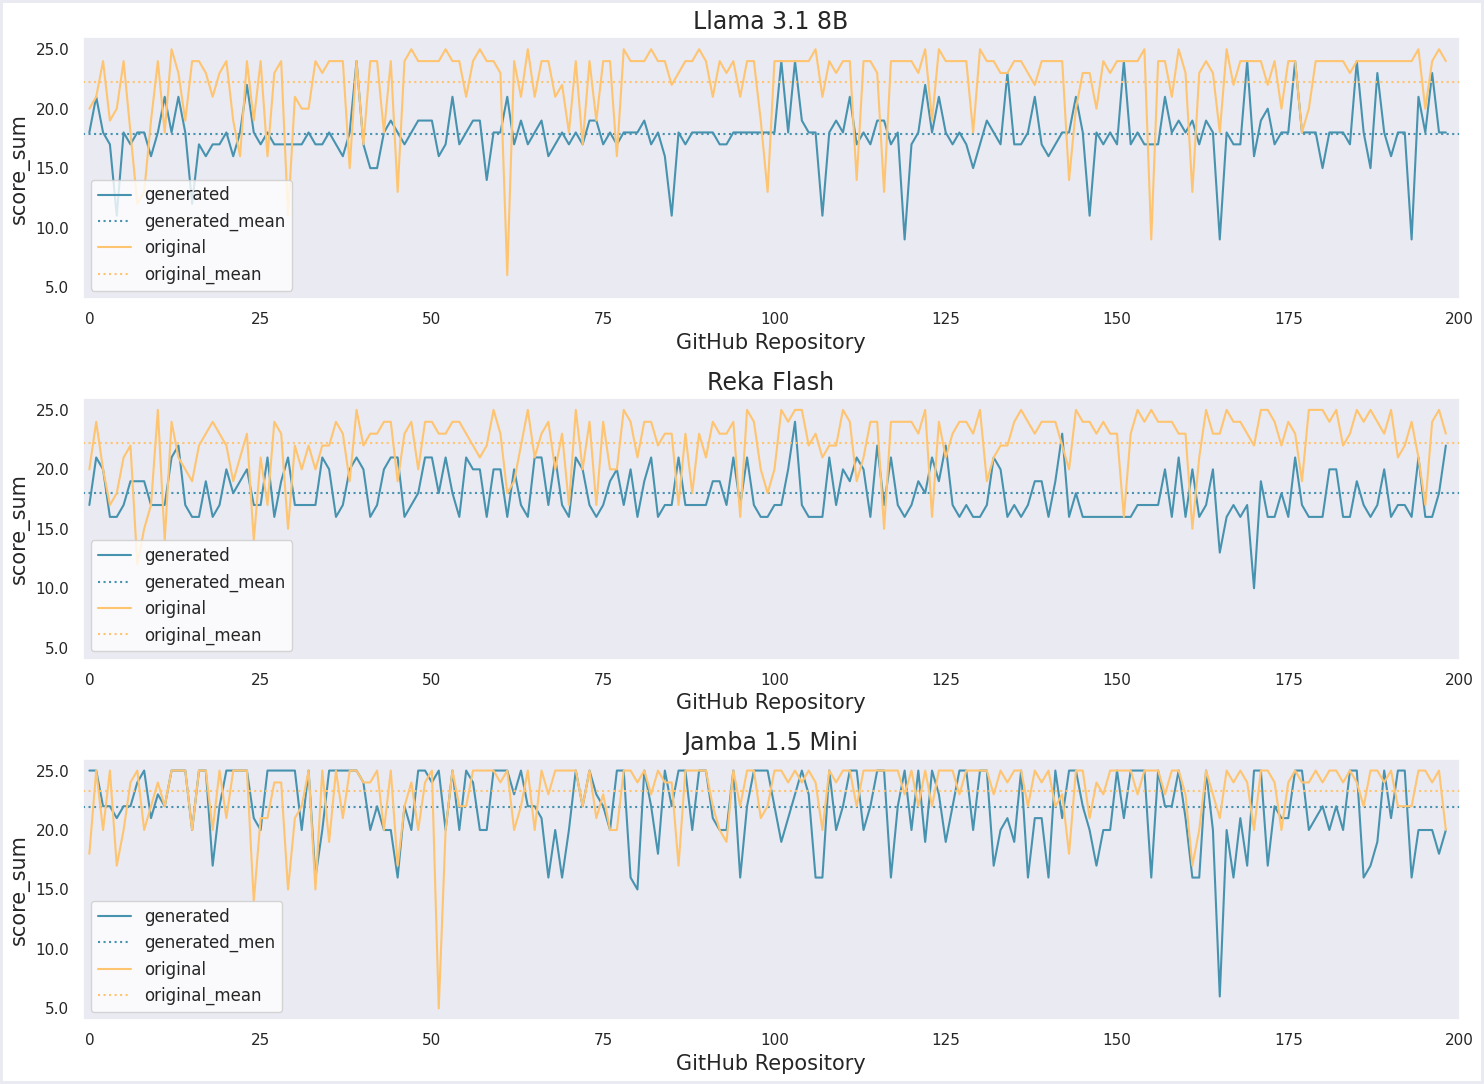

In [ ]:
# colors = ['#4793AF', '#FFC470', '#DD5746']

with sns.axes_style('white'): # applies white Seaborn style for axes
    sns.set_theme(style='dark') # applies dark Seaboarn style for better contrast
    fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(15, 11)) # create a figure and define size of plot
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame

    # llama
    l_score_g = df_eval_llama['total_score_g']
    l_score_g_mean = df_eval_llama['total_score_g'].mean()
    l_score_o = df_eval_llama['total_score_o']
    l_score_o_mean = df_eval_llama['total_score_o'].mean()

    # reka
    r_score_g = df_eval_reka['total_score_g']
    r_score_g_mean = df_eval_reka['total_score_g'].mean()
    r_score_o = df_eval_reka['total_score_o']
    r_score_o_mean = df_eval_reka['total_score_o'].mean()

    # jamba
    j_score_g = df_eval_jamba['total_score_g']
    j_score_g_mean = df_eval_jamba['total_score_g'].mean()
    j_score_o = df_eval_jamba['total_score_o']
    j_score_o_mean = df_eval_jamba['total_score_o'].mean()

    ax[0].plot(l_score_g, label='generated', color='#4793AF')
    ax[0].axhline(l_score_g_mean, label='generated_mean', color='#4793AF', linestyle=':')
    ax[0].plot(l_score_o, label='original', color='#FFC470')
    ax[0].axhline(l_score_o_mean, label='original_mean', color='#FFC470', linestyle=':')
    ax[0].set_title('Llama 3.1 8B', fontsize= 17)
    ax[0].legend(loc=3, fontsize=12, facecolor='white')
    ax[0].set_xlim(-1,200)
    ax[0].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[0].set_ylabel('score_sum', fontsize=15)
    ax[0].set_ylim(4,26)

    ax[1].plot(r_score_g, label='generated', color='#4793AF')
    ax[1].axhline(r_score_g_mean, label='generated_mean', color='#4793AF', linestyle=':')
    ax[1].plot(r_score_o, label='original', color='#FFC470')
    ax[1].axhline(r_score_o_mean, label='original_mean', color='#FFC470', linestyle=':')
    ax[1].set_title('Reka Flash', fontsize= 17)
    ax[1].legend(loc=3, fontsize=12, facecolor='white')
    ax[1].set_xlim(-1,200)
    ax[1].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[1].set_ylabel('score_sum', fontsize=15)
    ax[1].set_ylim(4,26)


    ax[2].plot(j_score_g, label='generated', color='#4793AF')
    ax[2].axhline(j_score_g_mean, label='generated_men', color='#4793AF', linestyle=':')
    ax[2].plot(j_score_o, label='original', color='#FFC470')
    ax[2].axhline(j_score_o_mean, label='original_mean', color='#FFC470', linestyle=':')
    ax[2].set_title('Jamba 1.5 Mini', fontsize= 17)
    ax[2].legend(loc=3, fontsize=12, facecolor='white')
    ax[2].set_xlim(-1,200)
    ax[2].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[2].set_ylabel('score_sum', fontsize=15)
    ax[2].set_ylim(4,26)

    plt.grid(visible=False) # turn of grid
    plt.tight_layout()
    plt.show() # shows plot

    sns.reset_defaults() # reset Seaborn settings

<u>Llama3.1-8b</u>  
Idx: 61  --> **jd_tenacity**  
The README file (README.rst) dosen't contain useful content. There is only one line of text: doc/source/index.rst  
Without any content the llms were not able to evaluate the README in an appropriate way.  

<u>Jamba 1.5-mini</u>  
Idx: 165 --> **tornadoweb_tornado**  
Generated README has received a low score from the llm's *llama3.1-8b* (9) and *jamba-1.5-mini* (6). The llm *reka-flash* ranked this README with a score value which is a bit higher (13).  

Idx: 51 --> **jingyaogong_minimind**  
The original README was twice evaluated by the llm *jamba-1.5-mini* but every time the llm was not able to add scoring values to the evaluation output. The other evaluation models were capeable adding scoring values to the output. For this reason, the minimum possible score for each question were added manually to avoid having to delete this GitHub repository from the sample.  

In [58]:
#fig.savefig("../pngs_ma/total_score_199_repos_all_llm.pdf")

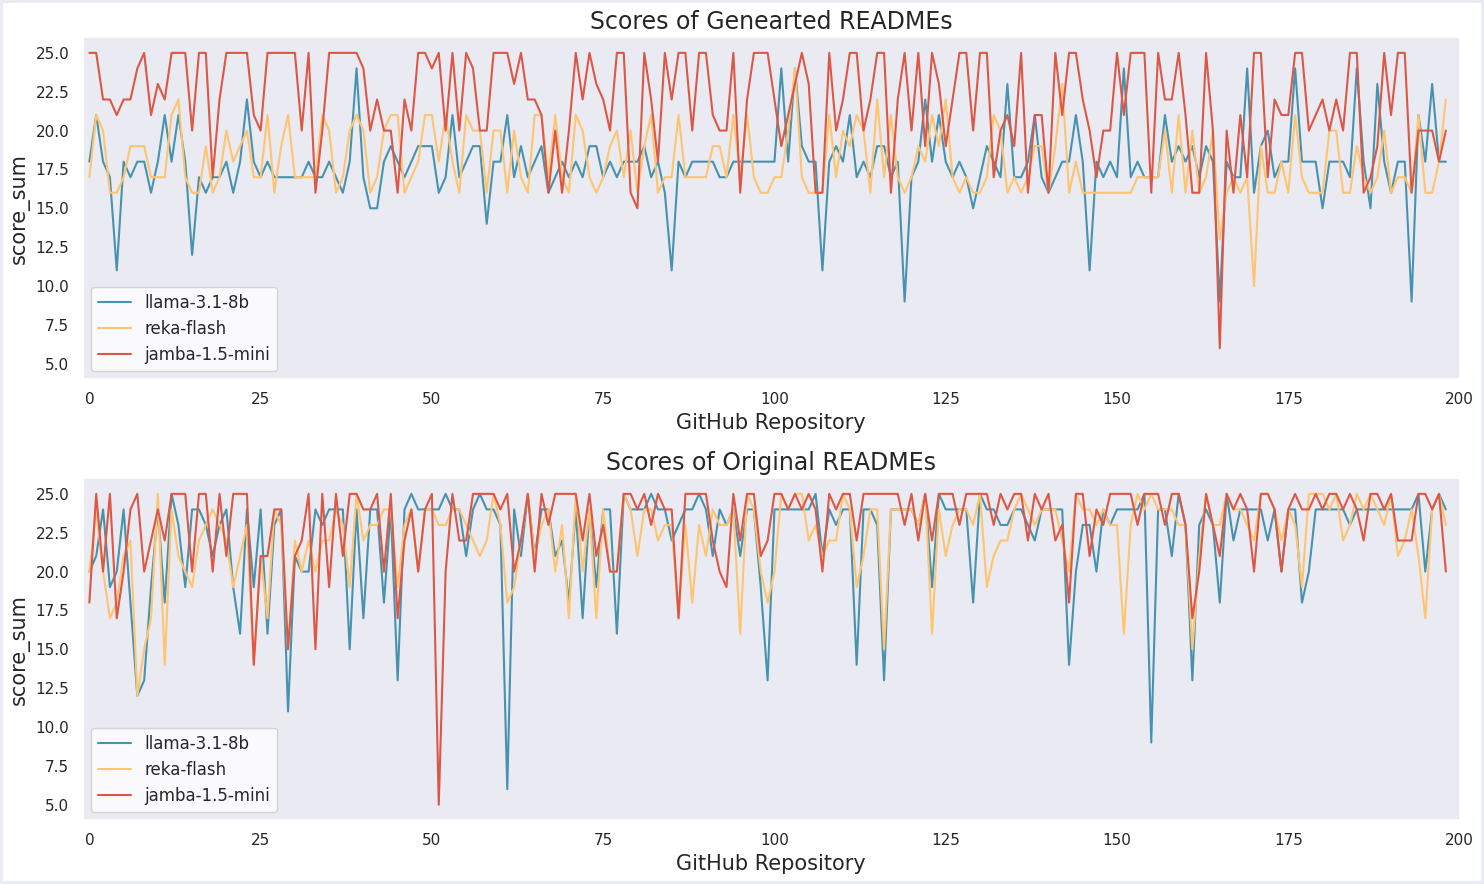

In [ ]:
# colors = ['#4793AF', '#FFC470', '#DD5746']

with sns.axes_style('white'): # applies white Seaborn style for axes
    sns.set_theme(style='dark') # applies dark Seaboarn style for better contrast
    fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15, 9)) # create a figure and define size of plot
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame

    # llama
    l_score_g = df_eval_llama['total_score_g']
    l_score_o = df_eval_llama['total_score_o']

    # reka
    r_score_g = df_eval_reka['total_score_g']
    r_score_o = df_eval_reka['total_score_o']

    # jamba
    j_score_g = df_eval_jamba['total_score_g']
    j_score_o = df_eval_jamba['total_score_o']

    ax[0].plot(l_score_g, label='llama-3.1-8b', color='#4793AF')
    ax[0].plot(r_score_g, label='reka-flash', color='#FFC470')
    ax[0].plot(j_score_g, label='jamba-1.5-mini', color='#DD5746')
    
    ax[0].set_title("Scores of Genearted READMEs", fontsize=17)
    ax[0].legend(loc=3, fontsize=12, facecolor='white')
    ax[0].set_xlim(-1,200)
    ax[0].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[0].set_ylim(4,26)
    ax[0].set_ylabel('score_sum', fontsize=15)

    
    ax[1].plot(l_score_o, label='llama-3.1-8b', color='#4793AF')
    ax[1].plot(r_score_o, label='reka-flash', color='#FFC470')
    ax[1].plot(j_score_o, label='jamba-1.5-mini', color='#DD5746')
    
    ax[1].set_title("Scores of Original READMEs", fontsize=17)
    ax[1].legend(loc=3, fontsize=12, facecolor='white')
    ax[1].set_xlim(-1,200)
    ax[1].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[1].set_ylim(4,26)
    ax[1].set_ylabel('score_sum', fontsize=15)

    plt.grid(visible=False) # turn of grid
    plt.tight_layout()
    plt.show() # shows plot

    sns.reset_defaults() # reset Seaborn settings

In [60]:
#fig.savefig("../pngs_ma/total_score_199_repos_all_llm_compare_g_o.pdf")

The evaluation results for the generated README files which were created by the llm *jamba-1.5-mini* have higher values then the scores which assigned by the other two llms.

## Dataframe df_llama_com  
This dataframe contains the compressed results from df_llama restricted on the total scores.

In [61]:
df_llama_tmp = df_llama[['id','repo_owner', 'repo_name', 'total_score_g', 'total_score_o', 'model_type']] # 'score_g', 'score_o', 'subsummary', 'subsummary_cnt']]

In [62]:
df_llama_tmp

,id,repo_owner,repo_name,total_score_g,total_score_o,model_type
0,openstack_openstack,openstack,openstack,18,20,llama3.1-8b
1,majumderb_rezero,majumderb,rezero,21,21,llama3.1-8b
2,andkret_Cookbook,andkret,Cookbook,18,24,llama3.1-8b
3,lennylxx_ipv6-hosts,lennylxx,ipv6-hosts,17,19,llama3.1-8b
4,awslabs_aws-config-to-elasticsearch,awslabs,aws-config-to-elasticsearch,11,20,llama3.1-8b
...,...,...,...,...,...,...
592,caronc_apprise,caronc,apprise,20,25,jamba-1.5-mini
593,google_tf-quant-finance,google,tf-quant-finance,20,25,jamba-1.5-mini
594,vega_altair,vega,altair,20,24,jamba-1.5-mini
595,psf_black,psf,black,18,25,jamba-1.5-mini


In [63]:
df_llama_tmp[df_llama_tmp['repo_name'] == 'keras-rl']

,id,repo_owner,repo_name,total_score_g,total_score_o,model_type
83,keras-rl_keras-rl,keras-rl,keras-rl,18,24,llama3.1-8b
282,keras-rl_keras-rl,keras-rl,keras-rl,16,22,reka-flash
481,keras-rl_keras-rl,keras-rl,keras-rl,18,25,jamba-1.5-mini


In [64]:
df_llama_tmp[df_llama_tmp['repo_name'] == 'openstack']

,id,repo_owner,repo_name,total_score_g,total_score_o,model_type
0,openstack_openstack,openstack,openstack,18,20,llama3.1-8b
199,openstack_openstack,openstack,openstack,17,20,reka-flash
398,openstack_openstack,openstack,openstack,25,18,jamba-1.5-mini


Calculate mean of score values.

In [65]:
# rows are grouped by 'id'
# .reset_index() --> prepare index of current df for merging into another df
# .rename() --> customise name of column which holds the results of the aggregation
df_tmp_g = df_llama_tmp.groupby('id')['total_score_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'total_score_g': 'score_g'})
df_tmp_o = df_llama_tmp.groupby('id')['total_score_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'total_score_o': 'score_o'})

# merge df_tmp_o & df_tmp_g by key 'id' to df_llama_tmp
df_llama_tmp = df_llama_tmp.merge(df_tmp_g, on='id', how='left') \
                           .merge(df_tmp_o, on='id', how='left')

Remove duplicate rows  
Each GitHub repository occurs three times because it was evaluated by three different models. Now only the mean of the three total_score values are required, so duplicates can be deleted.

In [66]:
df_llama_tmp = df_llama_tmp[~df_llama_tmp['model_type'].isin(['reka-flash', 'jamba-1.5-mini'])]

In [67]:
df_llama_com = df_llama_tmp[['id','repo_owner', 'repo_name', 'score_g', 'score_o']]

In [68]:
df_llama_com.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          199 non-null    object 
 1   repo_owner  199 non-null    object 
 2   repo_name   199 non-null    object 
 3   score_g     199 non-null    float64
 4   score_o     199 non-null    float64
dtypes: float64(2), object(3)
memory usage: 9.3+ KB


In [69]:
df_llama_com.describe()

,score_g,score_o
count,199.000000,199.000000
mean,19.251256,22.576214
std,1.802999,2.247501
min,9.333333,13.666667
25%,18.166667,21.666667
50%,19.333333,23.333333
75%,20.333333,24.333333
max,23.666667,25.000000


In [70]:
#df_llama_com.to_json('../data/evaluation_results/df_llama_com.json', orient='records')

### Visualize the mean (score of all three evaluation models) of all scores for the generated and the original README's

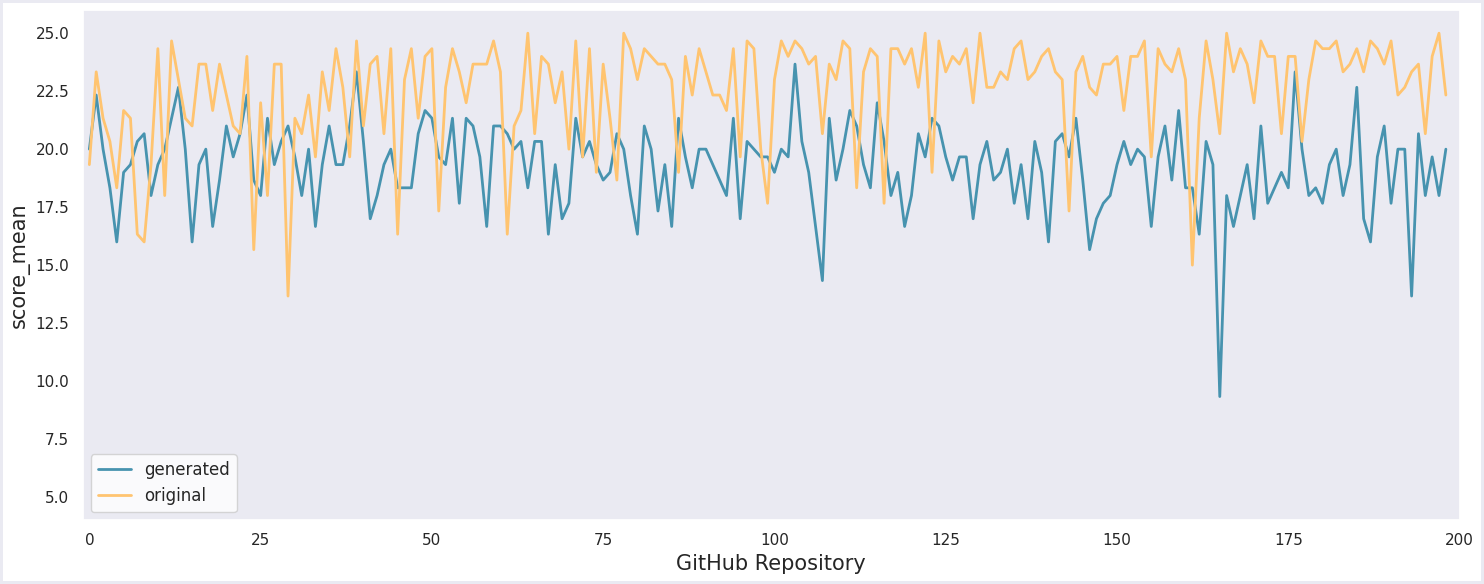

In [ ]:
# colors = ['#4793AF', '#FFC470', '#DD5746']

with sns.axes_style('white'): # use sns style for axis
    sns.set_theme(style='dark') # set theme
    fig, ax = plt.subplots(figsize=(15, 6)) # define figure and primary axis
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame

    x_labels = df_llama_com['id'] # ids of repositories
    x_numeric = np.arange(len(x_labels))  # numeric range with same length as x_labels (for trend numeric values are required)
    y_score_g = df_llama_com['score_g'] # number of summaries for each repository
    y_score_o = df_llama_com['score_o'] # total score of the genearted README's

    ax.plot(x_numeric, y_score_g, label='generated', color='#4793AF', linewidth=2)
    ax.plot(x_numeric, y_score_o, label='original', color='#FFC470', linewidth=2)
    ax.set_xlabel('Index GitHub Repository', fontsize=15)
    ax.set_ylabel('score_mean', fontsize=15)
    ax.tick_params(axis='y')

    #ax.set_xlabel('GitHub Repository') # set label for x-axis
    ax.set_xlim(-1,200)
    ax.set_ylim(4,26)

    plt.legend(fontsize=12, facecolor='white')
    #plt.title("Comparison of README Total Scores: Generated vs. Original",fontsize=17, pad=15) # set title
    fig.tight_layout()
    plt.show() # show plot

sns.reset_defaults() # reset sns changes

Idx: 164 --> **tornadoweb_tornado**  
Generated README has received a low score from the llm's *llama3.1-8b* (9) and *jamba-1.5-mini* (6). The llm *reka-flash* ranked this README with a score value which is a bit higher (13). The mean is 9.33.   

In [72]:
#fig.savefig("../pngs_ma/total_score_199_repos_g_o.pdf")

### *Additional dataframe with the total score and the score by each single question*

In [73]:
#df_llama[df_llama['repo_name'] == 'openstack']

In [74]:
df_llama_tmp2 = df_llama.copy()

In [75]:
df_tmp2_g_1 = df_llama_tmp2.groupby('id')['score_q1_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q1_g': 'score_q1_g_1'})
df_tmp2_g_2 = df_llama_tmp2.groupby('id')['score_q2_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q2_g': 'score_q2_g_2'})
df_tmp2_g_3 = df_llama_tmp2.groupby('id')['score_q3_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q3_g': 'score_q3_g_3'})
df_tmp2_g_4 = df_llama_tmp2.groupby('id')['score_q4_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q4_g': 'score_q4_g_4'})
df_tmp2_g_5 = df_llama_tmp2.groupby('id')['score_q5_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q5_g': 'score_q5_g_5'})

df_tmp2_o_1 = df_llama_tmp2.groupby('id')['score_q1_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q1_o': 'score_q1_o_1'})
df_tmp2_o_2 = df_llama_tmp2.groupby('id')['score_q2_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q2_o': 'score_q2_o_2'})
df_tmp2_o_3 = df_llama_tmp2.groupby('id')['score_q3_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q3_o': 'score_q3_o_3'})
df_tmp2_o_4 = df_llama_tmp2.groupby('id')['score_q4_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q4_o': 'score_q4_o_4'})
df_tmp2_o_5 = df_llama_tmp2.groupby('id')['score_q5_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q5_o': 'score_q5_o_5'})

df_llama_tmp2 = df_llama_tmp2.merge(df_tmp2_g_1, on='id', how='left') \
                           .merge(df_tmp2_g_2, on='id', how='left') \
                           .merge(df_tmp2_g_3, on='id', how='left') \
                           .merge(df_tmp2_g_4, on='id', how='left') \
                           .merge(df_tmp2_g_5, on='id', how='left') \
                           .merge(df_tmp2_o_1, on='id', how='left') \
                           .merge(df_tmp2_o_2, on='id', how='left') \
                           .merge(df_tmp2_o_3, on='id', how='left') \
                           .merge(df_tmp2_o_4, on='id', how='left') \
                           .merge(df_tmp2_o_5, on='id', how='left') 

In [76]:
df_llama_tmp2 = df_llama_tmp2.drop(['score_q1_g', 'score_q2_g','score_q3_g','score_q4_g', 'score_q5_g','score_q1_o', 'score_q2_o', 'score_q3_o', 'score_q4_o', 'score_q5_o', 'total_score_g', 'total_score_o'], axis=1)

In [77]:
#df_llama_tmp2[df_llama_tmp2['repo_name'] == 'openstack']

In [78]:
df_llama_tmp2 = df_llama_tmp2[~df_llama_tmp2['model_type'].isin(['reka-flash', 'jamba-1.5-mini'])]

In [79]:
df_llama_tmp2 = df_llama_tmp2.drop(['model_type'], axis=1)

In [80]:
df_llama_tmp2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 198
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            199 non-null    object 
 1   repo_owner    199 non-null    object 
 2   repo_name     199 non-null    object 
 3   score_q1_g_1  199 non-null    float64
 4   score_q2_g_2  199 non-null    float64
 5   score_q3_g_3  199 non-null    float64
 6   score_q4_g_4  199 non-null    float64
 7   score_q5_g_5  199 non-null    float64
 8   score_q1_o_1  199 non-null    float64
 9   score_q2_o_2  199 non-null    float64
 10  score_q3_o_3  199 non-null    float64
 11  score_q4_o_4  199 non-null    float64
 12  score_q5_o_5  199 non-null    float64
dtypes: float64(10), object(3)
memory usage: 21.8+ KB


In [81]:
df_llama_tmp2.head(5)

,id,repo_owner,repo_name,score_q1_g_1,score_q2_g_2,score_q3_g_3,score_q4_g_4,score_q5_g_5,score_q1_o_1,score_q2_o_2,score_q3_o_3,score_q4_o_4,score_q5_o_5
0,openstack_openstack,openstack,openstack,4.666667,4.000000,5.000000,3.000000,3.333333,4.000000,4.000000,3.000000,4.333333,4.000000
1,majumderb_rezero,majumderb,rezero,5.000000,4.333333,5.000000,3.333333,4.666667,5.000000,5.000000,4.666667,3.666667,5.000000
2,andkret_Cookbook,andkret,Cookbook,5.000000,4.333333,4.666667,2.666667,3.333333,4.666667,5.000000,4.000000,4.000000,3.666667
3,lennylxx_ipv6-hosts,lennylxx,ipv6-hosts,4.333333,4.333333,4.000000,2.333333,3.333333,4.666667,4.333333,3.666667,3.333333,4.333333
4,awslabs_aws-config-to-elasticsearch,awslabs,aws-config-to-elasticsearch,3.666667,3.333333,4.666667,2.000000,2.333333,4.000000,4.666667,4.000000,2.000000,3.666667


Visualize the compressed score for each question. The repositories are sorted by the execution order of the README generation (from small to big).

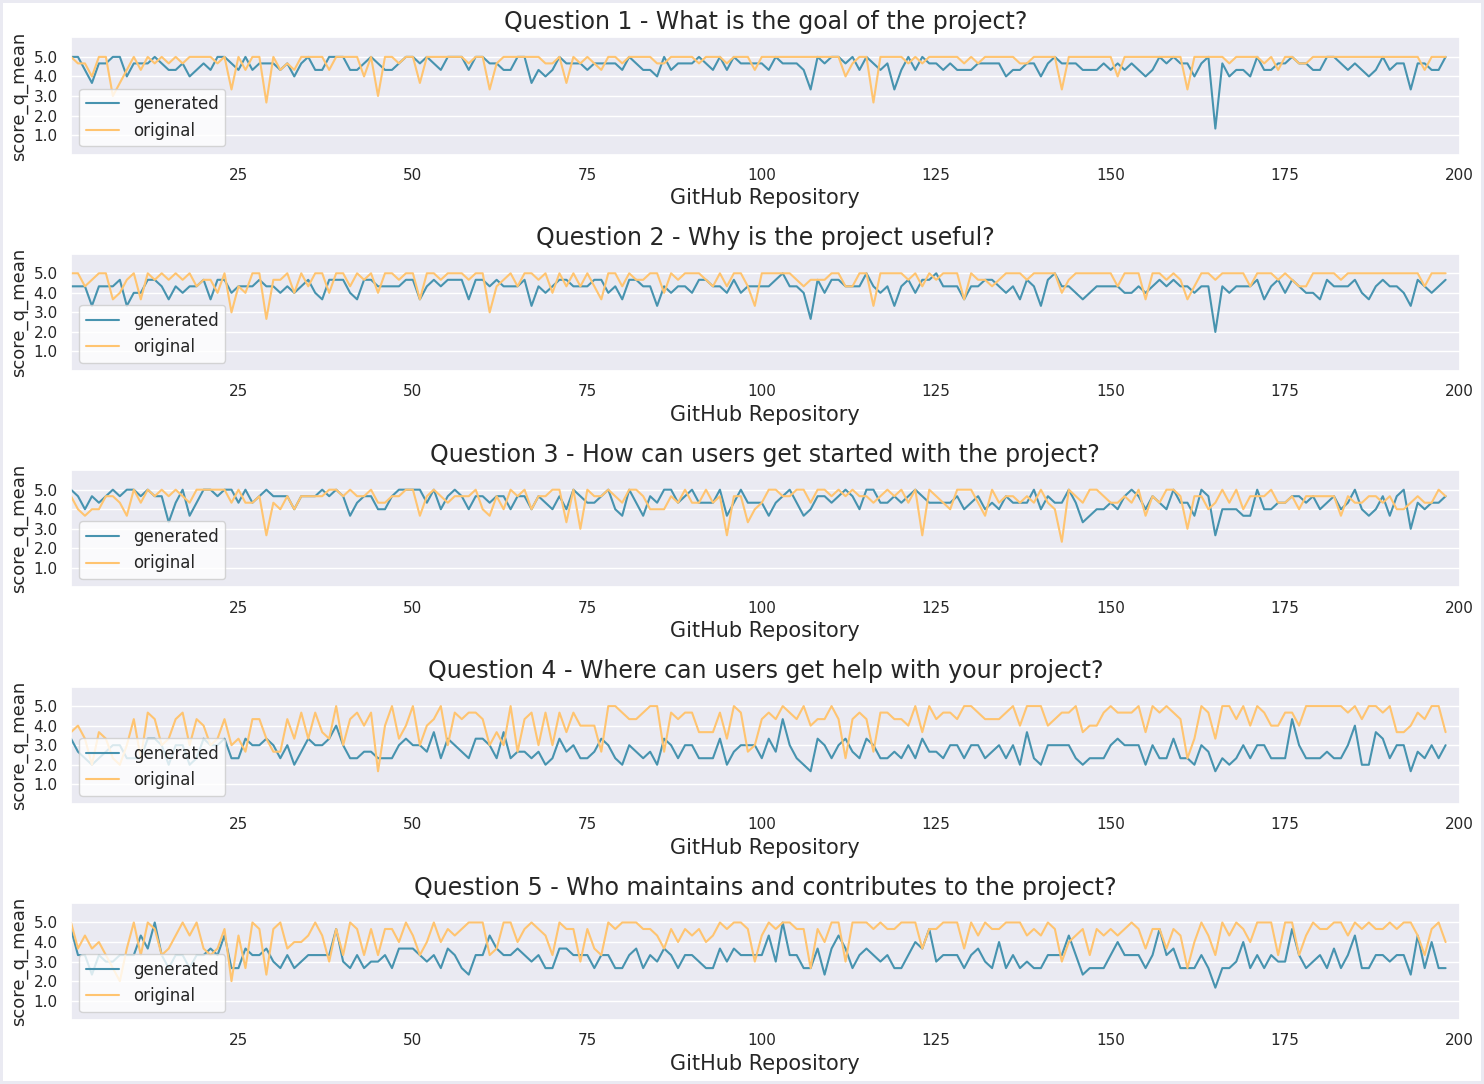

In [ ]:
# colors = ['#4793AF', '#FFC470', '#DD5746']

with sns.axes_style('white'): # applies white Seaborn style for axes
    sns.set_theme(style='dark') # applies dark Seaboarn style for better contrast
    fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(15, 11)) # create a figure and define size of plot
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame

    # generated
    q1_g = df_llama_tmp2['score_q1_g_1']
    q2_g = df_llama_tmp2['score_q2_g_2']
    q3_g = df_llama_tmp2['score_q3_g_3']
    q4_g = df_llama_tmp2['score_q4_g_4']
    q5_g = df_llama_tmp2['score_q5_g_5']
    # origignal
    q1_o = df_llama_tmp2['score_q1_o_1']
    q2_o = df_llama_tmp2['score_q2_o_2']
    q3_o = df_llama_tmp2['score_q3_o_3']
    q4_o = df_llama_tmp2['score_q4_o_4']
    q5_o = df_llama_tmp2['score_q5_o_5']

    ax[0].plot(q1_g, label='generated', color='#4793AF')
    ax[0].plot(q1_o, label='original', color='#FFC470')
    ax[0].set_title('Question 1 - What is the goal of the project?', fontsize=17)
    ax[0].legend(loc=3, fontsize=12, facecolor='white')
    ax[0].set_xlim(1,200)
    ax[0].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[0].set_yticks([1, 2, 3, 4, 5])
    ax[0].set_ylim(0,6)
    ax[0].set_ylabel('score_q_mean', fontsize=13)
    ax[0].grid(visible=True, axis='y')

    ax[1].plot(q2_g, label='generated', color='#4793AF')
    ax[1].plot(q2_o, label='original', color='#FFC470')
    ax[1].set_title('Question 2 - Why is the project useful?', fontsize=17)
    ax[1].legend(loc=3, fontsize=12, facecolor='white')
    ax[1].set_xlim(1,200)
    ax[1].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[1].set_yticks([1, 2, 3, 4, 5])
    ax[1].set_ylim(0,6)
    ax[1].set_ylabel('score_q_mean', fontsize=13)
    ax[1].grid(visible=True, axis='y') 

    ax[2].plot(q3_g, label='generated', color='#4793AF')
    ax[2].plot(q3_o, label='original', color='#FFC470')
    ax[2].set_title('Question 3 - How can users get started with the project?', fontsize=17)
    ax[2].legend(loc=3, fontsize=12, facecolor='white')
    ax[2].set_xlim(1,200)
    ax[2].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[2].set_yticks([1, 2, 3, 4, 5])
    ax[2].set_ylim(0,6)
    ax[2].set_ylabel('score_q_mean', fontsize=13)
    ax[2].grid(visible=True, axis='y')

    ax[3].plot(q4_g, label='generated', color='#4793AF')
    ax[3].plot(q4_o, label='original', color='#FFC470')
    ax[3].set_title('Question 4 - Where can users get help with your project?', fontsize=17)
    ax[3].legend(loc=3, fontsize=12, facecolor='white')
    ax[3].set_xlim(1,200)
    ax[3].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[3].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[3].set_yticks([1, 2, 3, 4, 5])
    ax[3].set_ylim(0,6)
    ax[3].set_ylabel('score_q_mean', fontsize=13)
    ax[3].grid(visible=True, axis='y')

    ax[4].plot(q5_g, label='generated', color='#4793AF')
    ax[4].plot(q5_o, label='original', color='#FFC470')
    ax[4].set_title('Question 5 - Who maintains and contributes to the project?', fontsize=17)
    ax[4].legend(loc=3, fontsize=12, facecolor='white')
    ax[4].set_xlim(1,200)
    ax[4].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[4].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[4].set_yticks([1, 2, 3, 4, 5])
    ax[4].set_ylim(0,6)
    ax[4].set_ylabel('score_q_mean', fontsize=13)
    ax[4].grid(visible=True, axis='y')

    # plt.grid(visible=True)
    plt.tight_layout()
    plt.show() # shows plot

    sns.reset_defaults() # reset Seaborn settings

In [83]:
#fig.savefig("../pngs_ma/score_question_199_repos_g_o.pdf")

In [84]:
df_llama_tmp2.describe()

,score_q1_g_1,score_q2_g_2,score_q3_g_3,score_q4_g_4,score_q5_g_5,score_q1_o_1,score_q2_o_2,score_q3_o_3,score_q4_o_4,score_q5_o_5
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,4.561139,4.281407,4.447236,2.721943,3.239531,4.793970,4.710218,4.514238,4.174204,4.383585
std,0.409658,0.400736,0.439852,0.490955,0.543424,0.447574,0.448594,0.506627,0.777651,0.683901
min,1.333333,2.000000,2.666667,1.666667,1.666667,2.666667,2.666667,2.333333,1.666667,2.000000
25%,4.333333,4.000000,4.333333,2.333333,2.666667,4.666667,4.666667,4.333333,3.666667,4.000000
50%,4.666667,4.333333,4.333333,2.666667,3.333333,5.000000,5.000000,4.666667,4.333333,4.666667
75%,4.666667,4.666667,4.666667,3.000000,3.333333,5.000000,5.000000,5.000000,4.666667,5.000000
max,5.000000,5.000000,5.000000,4.333333,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [85]:
#df_llama_tmp2.to_json('../data/evaluation_results/df_llama_questions.json', orient='records')

## README's with summaries and subsummaries

In [86]:
df_llama_com

,id,repo_owner,repo_name,score_g,score_o
0,openstack_openstack,openstack,openstack,20.000000,19.333333
1,majumderb_rezero,majumderb,rezero,22.333333,23.333333
2,andkret_Cookbook,andkret,Cookbook,20.000000,21.333333
3,lennylxx_ipv6-hosts,lennylxx,ipv6-hosts,18.333333,20.333333
4,awslabs_aws-config-to-elasticsearch,awslabs,aws-config-to-elasticsearch,16.000000,18.333333
...,...,...,...,...,...
194,caronc_apprise,caronc,apprise,20.666667,23.666667
195,google_tf-quant-finance,google,tf-quant-finance,18.000000,20.666667
196,vega_altair,vega,altair,19.666667,24.000000
197,psf_black,psf,black,18.000000,25.000000


In [87]:
df_llama_com['subsummary'] = 0
df_llama_com['summary_cnt'] = 0

/tmp/ipykernel_3259/2102315245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_llama_com['subsummary'] = 0
/tmp/ipykernel_3259/2102315245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_llama_com['summary_cnt'] = 0


Get information about summaries and expand dataframe df_llama_com with additional informations about the number of summaries.

In [88]:
for idx, row in df_llama_com.iterrows():
    id = row['id']
    path = f'../data/output_readme_data_lama/{id}_output.json'

    with open(path, 'r') as f:
        loaded_data = json.load(f)

    subsummaries_cnt = len(loaded_data['summaries'])

    df_llama_com.loc[idx, 'subsummary'] = 1 if subsummaries_cnt > 1 else 0
    df_llama_com.loc[idx, 'summary_cnt'] = subsummaries_cnt

In [89]:
df_llama_com.describe()

,score_g,score_o,subsummary,summary_cnt
count,199.000000,199.000000,199.000000,199.00000
mean,19.251256,22.576214,0.351759,4.80402
std,1.802999,2.247501,0.478723,6.88042
min,9.333333,13.666667,0.000000,1.00000
25%,18.166667,21.666667,0.000000,1.00000
50%,19.333333,23.333333,0.000000,1.00000
75%,20.333333,24.333333,1.000000,6.50000
max,23.666667,25.000000,1.000000,46.00000


Visualize the total score for each GitHub repository. The repositories are sorted by the execution order of the README generation (from small to big).

In [90]:
df_sorted_summary = df_llama_com.sort_values('summary_cnt', ascending=True) # create a copy of df_llama_com and sort the values

In [91]:
df_sorted_summary.loc[df_sorted_summary['score_g'].idxmin()]

id             tornadoweb_tornado
repo_owner             tornadoweb
repo_name                 tornado
score_g                  9.333333
score_o                 20.666667
subsummary                      1
summary_cnt                     9
Name: 165, dtype: object

In [92]:
df_sorted_summary['score_g'].sort_values(ascending=True)

165     9.333333
193    13.666667
107    14.333333
146    15.666667
15     16.000000
         ...    
185    22.666667
13     22.666667
176    23.333333
39     23.333333
103    23.666667
Name: score_g, Length: 199, dtype: float64

In [93]:
df_sorted_summary.loc[192] # print scores for specific index 

id             hustvl_Vim
repo_owner         hustvl
repo_name             Vim
score_g              20.0
score_o         22.666667
subsummary              1
summary_cnt            22
Name: 192, dtype: object

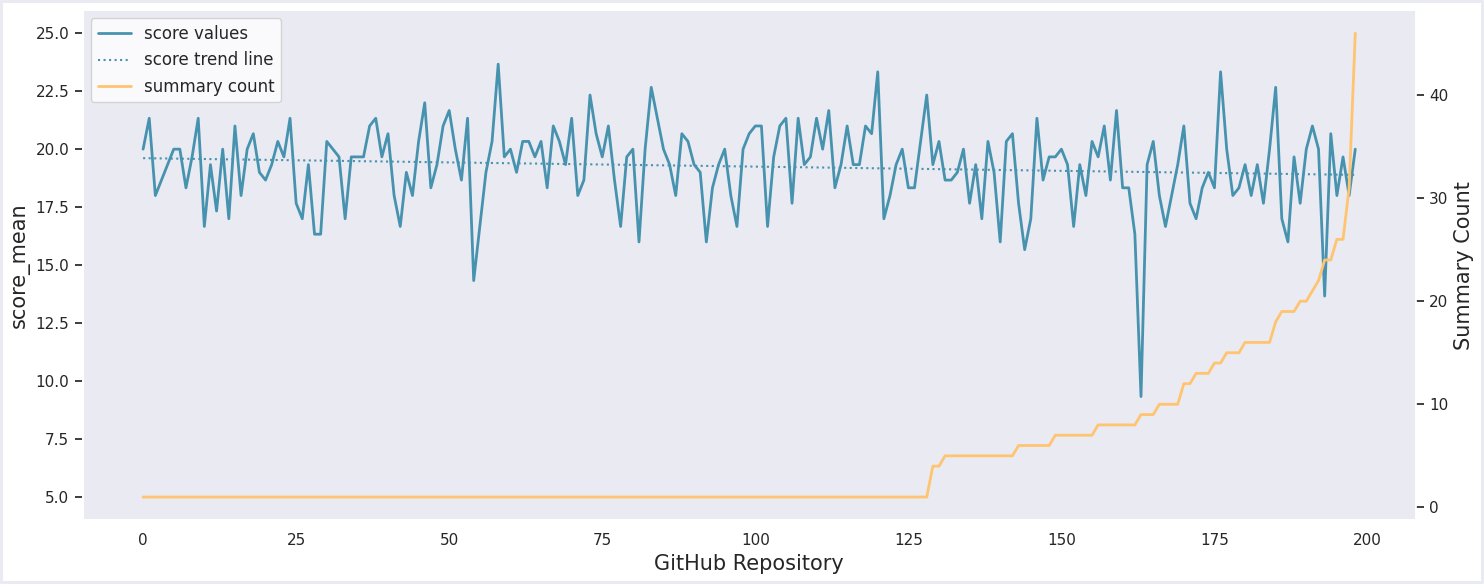

In [ ]:
with sns.axes_style('white'): # use sns style for axis
    sns.set_theme(style='dark') # set theme
    fig, ax1 = plt.subplots(figsize=(15, 6)) # define figure and primary axis
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame
   
    x_labels = df_sorted_summary['id'] # ids of repositories
    x_numeric = np.arange(len(x_labels))  # numeric range with same length as x_labels (for trend numeric values are required)
    y_summary = df_sorted_summary['summary_cnt'] # number of summaries for each repository
    y_score = df_sorted_summary['score_g'] # total score of the genearted README's

    ax1.plot(x_numeric, y_score, label='score values', color='#4793AF', linewidth=2) # plot of score of README's
    z = np.polyfit(x_numeric, y_score, 1) # create data for a trend line: '1' degree --> linear 
    # print(z) [-3.71956692e-03  1.96088016e+01] --> y = -3.72x + 1.96
    p = np.poly1d(z) # convert z into callable function p()
    ax1.plot(x_numeric, p(x_numeric), linestyle=':', color='#4793AF', label='score trend line') # plot trend line
    ax1.set_ylabel('score_mean', fontsize=15) # set label for trend line
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx() # create second axis which shares x-axis with ax1
    ax2.plot(x_numeric, y_summary, label='summary count', color='#FFC470', linewidth=2) # plot of number of summaries
    ax2.set_ylabel('Summary Count', fontsize=15) # set label for summary count
    ax2.tick_params(axis='y')

    # with the following code I hoped to viusalize a change, if subsummaries are requiered for the README generation --> :-(
    # rolling_window = 10  # You can tweak this value based on how smooth you want the curve
    # rolling_avg = y_score.rolling(window=rolling_window, center=True).mean()
    # ax2.plot(x_numeric, rolling_avg, linestyle=':', linewidth=2, color='#8B5FBF', label='Score (Rolling Avg)')

    ax1.set_xlabel('Index GitHub Repository', fontsize=15) # set label for x-axis
    ax1.set_ylim(4,26)

    lines1, labels1 = ax1.get_legend_handles_labels() # collect labels from plotted lines
    lines2, labels2 = ax2.get_legend_handles_labels() # collect labels from plotted lines
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12, facecolor='white') # combines legends from both axes into one legend

    #plt.title("Number of GitHub repository summaries and the resulting scores for generated README's",fontsize=17, pad=15) # set title
    fig.tight_layout()
    plt.show() # show plot

sns.reset_defaults() # reset sns changes


The plot show the number of requiered summaries for each processed GitHub repository and the given score value for the generated README files. According to an estimate of 130 GitHub repositories there are multiple subsummaries needed to generate the README file. At this point the number of input tokens of the LLM are exhausted.  
A sligth downward trend of the scoring values is recongnizable.  

Idx: 164 --> **tornadoweb_tornado**  
Generated README has received a low score from the llm's *llama3.1-8b* (9) and *jamba-1.5-mini* (6). The llm *reka-flash* ranked this README with a score value which is a bit higher (13). The mean is 9.33.  

Idx: 192 --> **pytorch_vision**  
The generated README file received bad scores for the fourth and fifth question from all three evaluation models. 
| model_type      | q1 | q2 | q3 | q4 | q5 | total_score |
|-----------------|----|----|----|----|----|-------------|
| llama3.1-8b      | 2  | 3  | 2  | 1  | 1  | 9           |
| reka-flash       | 4  | 3  | 4  | 2  | 3  | 16          |
| jamba-1.5-mini   | 4  | 4  | 3  | 2  | 3  | 16          |  

The mean is 13.67

In [95]:
#fig.savefig("../pngs_ma/total_score_199_repos_summary.pdf")

## compare score_mean with number of characters in source code

In [96]:
df_llama_com.head(4)

,id,repo_owner,repo_name,score_g,score_o,subsummary,summary_cnt
0,openstack_openstack,openstack,openstack,20.000000,19.333333,0,1
1,majumderb_rezero,majumderb,rezero,22.333333,23.333333,0,1
2,andkret_Cookbook,andkret,Cookbook,20.000000,21.333333,0,1
3,lennylxx_ipv6-hosts,lennylxx,ipv6-hosts,18.333333,20.333333,0,1


In [97]:
df_num_characters = load_data(path='../data/df_repos_counts_filtered.json')

In [100]:
df_num_characters = add_id_col(df_num_characters)

In [102]:
df_num_characters = df_num_characters[['id', 'source_code_cleaned_comments']]
df_num_characters.head(4)

,id,source_code_cleaned_comments
0,openstack_openstack,1477
1,Taniiishk_Rock-Paper-Scissors-Game,2133
2,majumderb_rezero,5645
3,diego-vicente_som-tsp,5778


In [103]:
df_score_char = df_llama_com.copy()
df_score_char = df_score_char[['id', 'score_g', 'score_o']]
df_score_char = df_score_char.merge(df_num_characters, on='id', how='left')

df_score_char.head(4)

,id,score_g,score_o,source_code_cleaned_comments
0,openstack_openstack,20.000000,19.333333,1477
1,majumderb_rezero,22.333333,23.333333,5645
2,andkret_Cookbook,20.000000,21.333333,7942
3,lennylxx_ipv6-hosts,18.333333,20.333333,8966


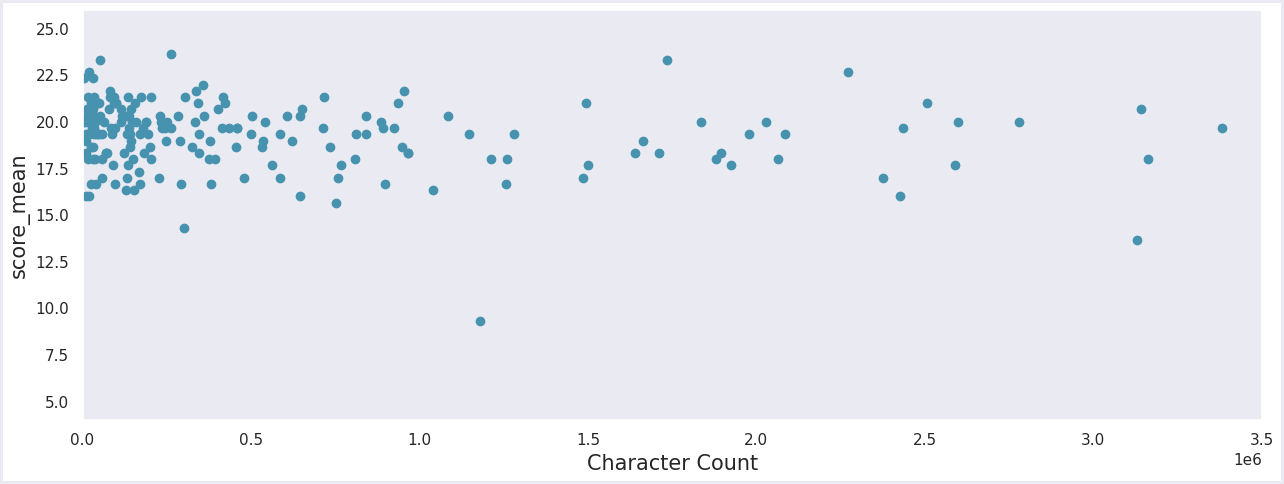

In [138]:
with sns.axes_style('white'): # use sns style for axis
    sns.set_theme(style='dark') # set theme
    fig, ax1 = plt.subplots(figsize=(13, 5)) # define figure and primary axis
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame
   
    x_labels = df_score_char['id'] # ids of repositories
    x_chars= df_score_char['source_code_cleaned_comments'] # number of characters in source code after cleaning for each repository
    y_score = df_score_char['score_g'] # total score of the genearted README's

    ax1.scatter(x_chars, y_score, label='score values', color='#4793AF') # plot of score of README's
    ax1.set_ylabel('score_mean', fontsize=15) # set label for trend line
    ax1.tick_params(axis='y')
    ax1.set_xlim(0,3500000)

    ax1.set_xlabel('Character Count', fontsize=15) # set label for x-axis
    ax1.set_ylim(4,26)

    lines1, labels1 = ax1.get_legend_handles_labels() # collect labels from plotted lines
    lines2, labels2 = ax2.get_legend_handles_labels() # collect labels from plotted lines
    
    fig.tight_layout()
    plt.show() # show plot

sns.reset_defaults() # reset sns changes

In [139]:
fig.savefig("../pngs_ma/total_score_199_repos_characters.pdf")

## Dataframe df_llama_meta  
This dataframe contains the scoring for the original README files with addtional information about the GitHub repository.

In [215]:
df_llama_meta = df_llama_com[['id', 'repo_owner', 'repo_name', 'score_o']]

In [216]:
df_meta = load_data(path='../data/df_repos_sample_250.json')

In [217]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 251 non-null    int64  
 1   name               251 non-null    object 
 2   full_name          251 non-null    object 
 3   html_url           251 non-null    object 
 4   description        251 non-null    object 
 5   url                251 non-null    object 
 6   labels_url         251 non-null    object 
 7   created_at         251 non-null    object 
 8   updated_at         251 non-null    object 
 9   pushed_at          251 non-null    object 
 10  size               251 non-null    int64  
 11  stargazers_count   251 non-null    int64  
 12  watchers_count     251 non-null    int64  
 13  language           251 non-null    object 
 14  has_issues         251 non-null    bool   
 15  has_projects       251 non-null    bool   
 16  has_downloads      251 non

In [218]:
df_meta[df_meta['full_name'] == 'langchain-ai/local-deep-researcher']

,id,name,full_name,html_url,description,url,labels_url,created_at,updated_at,pushed_at,...,allow_forking,topics,visibility,forks,open_issues,watchers,default_branch,score,language_spoken,license_type
250,898736877,langchain-ai,langchain-ai/local-deep-researcher,https://github.com/langchain-ai/local-deep-res...,Fully local web research and report writing as...,https://api.github.com/repos/langchain-ai/loca...,https://api.github.com/repos/langchain-ai/loca...,2024-12-04T23:57:20Z,2025-07-06T07:02:50Z,2025-06-26T03:10:38Z,...,True,[],public,782,37,7741,main,0.0,en,mit


In [219]:
df_meta['id_name'] = df_meta['full_name'].apply(lambda x: x.replace('/', '_'))

In [220]:
df_meta_com = df_meta[['id_name', 'stargazers_count', 'forks_count', 'license_type']]
df_meta_com = df_meta_com.rename(columns={'id_name': 'id'})

In [221]:
df_meta_com.head(3)

,id,stargazers_count,forks_count,license_type
0,pydantic_logfire,2970,110,mit
1,mem0ai_mem0,27455,2612,apache-2.0
2,taki0112_Tensorflow-Cookbook,2772,469,mit


In [222]:
df_meta_com[df_meta_com['id'] == 'langchain-ai_local-deep-researcher']

,id,stargazers_count,forks_count,license_type
250,langchain-ai_local-deep-researcher,7741,782,mit


In the next step the relevant metadata will be joined to the dataframe df_llama_o.

In [223]:
df_llama_meta = df_llama_meta.merge(df_meta_com, on='id', how='left')

In [224]:
df_llama_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                199 non-null    object 
 1   repo_owner        199 non-null    object 
 2   repo_name         199 non-null    object 
 3   score_o           199 non-null    float64
 4   stargazers_count  199 non-null    int64  
 5   forks_count       199 non-null    int64  
 6   license_type      199 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 11.0+ KB


In [ ]:
#df_llama_meta.to_json('../data/evaluation_results/df_llama_meta.json', orient='records')

### Boxplots with total score of original README's over license type

In [226]:
df_llama_meta['license_type'].unique()

array(['apache-2.0', 'mit', 'bsd-2-clause', 'isc', 'bsd-3-clause'],
      dtype=object)

In [227]:
df_llama_meta['license_type_code'] = pd.factorize(df_llama_meta['license_type'])[0] # encode categorical to numeric value and access first element in tuple
df_llama_meta['license_type_code'].unique()

array([0, 1, 2, 3, 4])

In [228]:
license_counts = df_llama_meta['license_type'].value_counts()

In [229]:
license_counts

license_type
mit             111
apache-2.0       68
bsd-3-clause     16
bsd-2-clause      3
isc               1
Name: count, dtype: int64

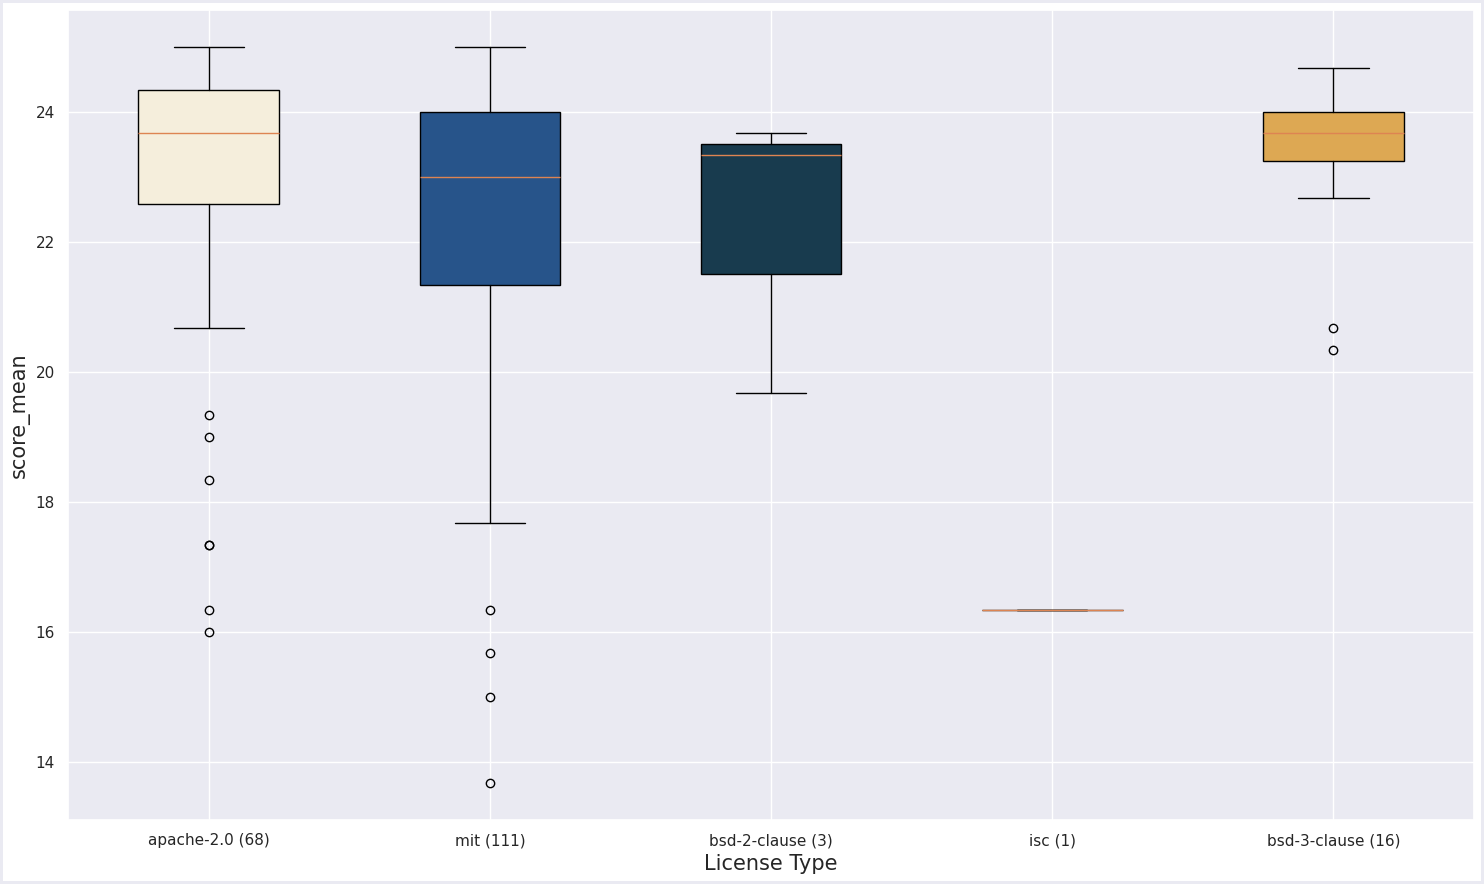

In [ ]:
with sns.axes_style('white'): # use sns style for axis
    sns.set_theme(style='dark') # set theme
    license_type_code = [0, 1, 2, 3, 4]
    license_type = ['apache-2.0', 'mit', 'bsd-2-clause', 'isc', 'bsd-3-clause']
    license_labels = [f"{name} ({license_counts[name]})" for name in license_type]

    colors = ['#F5EEDC', '#27548A', "#183B4E", '#819A91','#DDA853']
    grouped_scores = [df_llama_meta[df_llama_meta['license_type_code'] == code]['score_o']for code in license_type_code]

    fig, ax = plt.subplots(figsize=(15, 9))
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame
    bplot = ax.boxplot(grouped_scores, patch_artist=True, tick_labels=license_labels)

    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    ax.set_ylabel('score_mean', fontsize=15)
    ax.set_xlabel('License Type', fontsize=15)
    ax.tick_params(axis='x', labelsize=14)

    fig.tight_layout()
    #plt.title('Total Score Distribution of Original README Files by License Type',fontsize=17, pad=15)
    plt.grid(visible=True)
    plt.show()

sns.reset_defaults() # reset sns changes

*Note: The box extends from the first quartile (Q1) to the third quartile (Q3) of the data, with a line at the median. The whiskers extend from the box to the farthest data point lying within 1.5x the inter-quartile range (IQR) from the box. Flier points are those past the end of the whiskers.*  
     Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR  
                  |-----:-----|  
  o      |--------|     :     |--------|    o  o  
                  |-----:-----|  
flier             <----------->            fliers  
                       IQR  

The type of license has no great influence on the quality of README's. With execption for the license type *ISC* the total score for the original README files is between 20 and 24. GitHub repositories with the license type *MIT* have the largest distribution but this licence type is allocated the most.  
There is one single GitHub repository which has the license type *ISC* and its ranked with the lowest score. But only example is not sufficient to make generally valid statements.

In [ ]:
#fig.savefig("../pngs_ma/total_score_199_repos_license.pdf")

### Plot with total score over number of stars

In [232]:
df_sorted_stars = df_llama_meta.sort_values('stargazers_count', ascending=True) # create a copy of df_llama_meta and sort the values

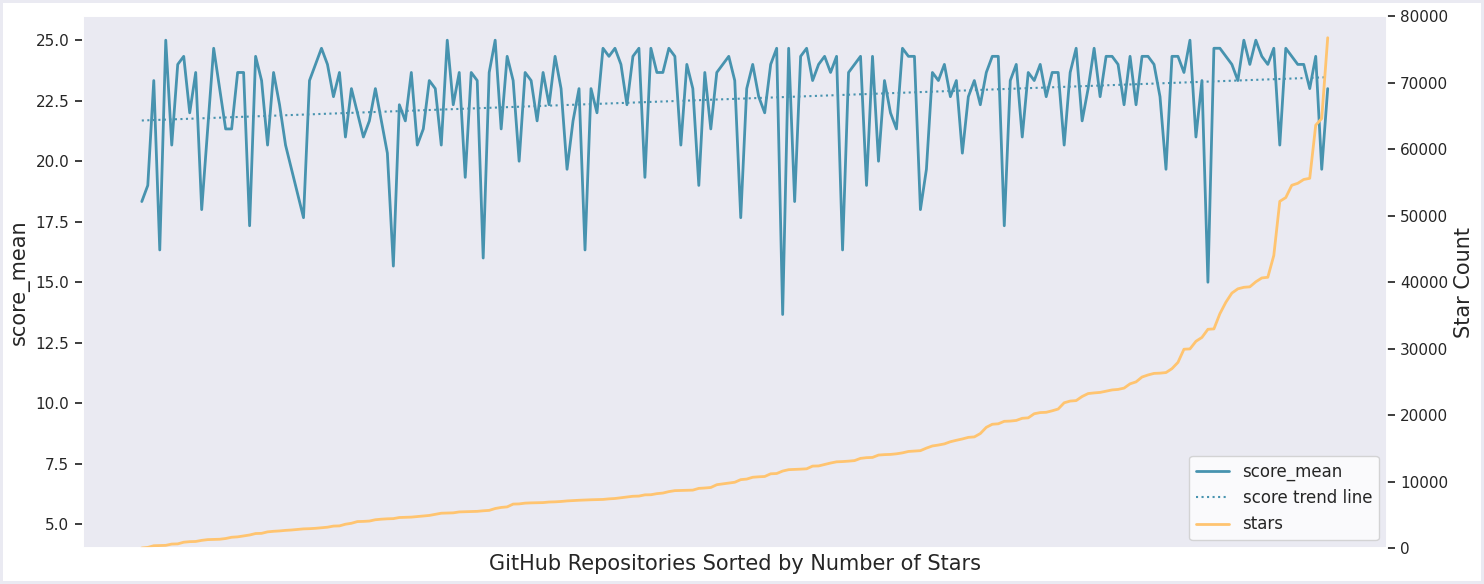

In [ ]:
with sns.axes_style('white'): # use sns style for axis
    sns.set_theme(style='dark') # set theme
    fig, ax1 = plt.subplots(figsize=(15, 6)) # define figure and primary axis
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame
   
    x_labels = df_sorted_stars['id']
    x_numeric = np.arange(len(x_labels))
    y_stars = df_sorted_stars['stargazers_count'] # ids of repositories
    y_score_o = df_sorted_stars['score_o'] # total score of the genearted README's

    ax1.plot(x_numeric, y_score_o, label='score_mean', color='#4793AF', linewidth=2) # plot of score of README's
    z = np.polyfit(x_numeric, y_score_o, 1) # create data for a trend line: '1' degree --> linear 
    # print(z) [-3.71956692e-03  1.96088016e+01] --> y = -3.72x + 1.96
    p = np.poly1d(z) # convert z into callable function p()
    ax1.plot(x_numeric, p(x_numeric), linestyle=':', color='#4793AF', label='score trend line') # plot trend line
    ax1.set_ylabel('score_mean', fontsize=15) # set label for trend line
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx() # create second axis which shares x-axis with ax1
    ax2.plot(x_numeric, y_stars, label='stars', color='#FFC470', linewidth=2) # plot of number of summaries
    ax2.set_ylabel('Star Count', fontsize=15) # set label for summary count
    ax2.tick_params(axis='y')
    ax2.set_ylim(0,80000)

    ax1.set_xlabel('GitHub Repository Index Sorted by Number of Stars', fontsize=15) # set label for x-axis
    ax1.set_xticks([]) # hide ticks
    ax1.set_ylim(4,26)

    lines1, labels1 = ax1.get_legend_handles_labels() # collect labels from plotted lines
    lines2, labels2 = ax2.get_legend_handles_labels() # collect labels from plotted lines
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower right', fontsize=12, facecolor='white') # combines legends from both axes into one legend

    #plt.title("Comparing README Quality with Stargazer Counts Across GitHub Repositories",fontsize=17, pad=15) # set title
    fig.tight_layout()
    plt.show() # show plot

sns.reset_defaults() # reset sns changes

In [ ]:
#fig.savefig("../pngs_ma/total_score_199_repos_stars.pdf")

### Plot with total score over number of forks

In [235]:
df_sorted_forks = df_llama_meta.sort_values('forks_count', ascending=True) # create a copy of df_llama_meta and sort the values

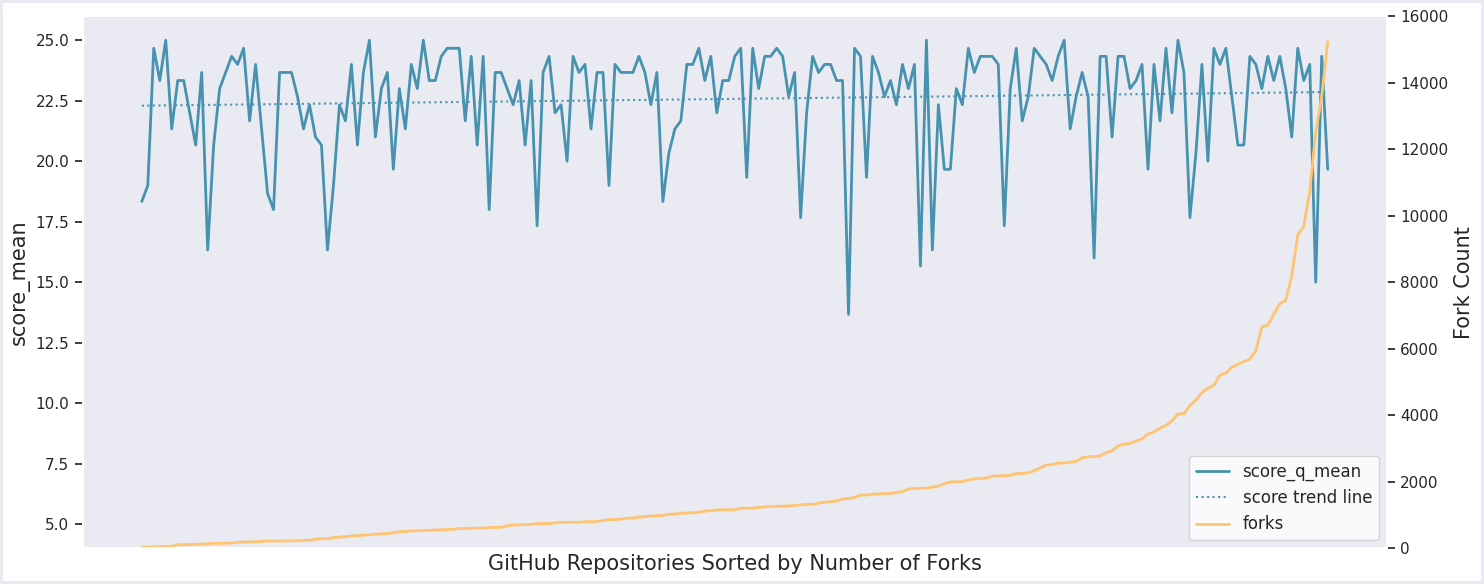

In [ ]:
with sns.axes_style('white'): # use sns style for axis
    sns.set_theme(style='dark') # set theme
    fig, ax1 = plt.subplots(figsize=(15, 6)) # define figure and primary axis
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame
   
    x_labels = df_sorted_forks['id']
    x_numeric = np.arange(len(x_labels))
    y_stars = df_sorted_forks['forks_count'] # ids of repositories
    y_score_o = df_sorted_forks['score_o'] # total score of the genearted README's

    ax1.plot(x_numeric, y_score_o, label='score_q_mean', color='#4793AF', linewidth=2) # plot of score of README's
    z = np.polyfit(x_numeric, y_score_o, 1) # create data for a trend line: '1' degree --> linear 
    # print(z) [-3.71956692e-03  1.96088016e+01] --> y = -3.72x + 1.96
    p = np.poly1d(z) # convert z into callable function p()
    ax1.plot(x_numeric, p(x_numeric), linestyle=':', color='#4793AF', label='score trend line') # plot trend line
    ax1.set_ylabel('score_mean', fontsize=15) # set label for trend line
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx() # create second axis which shares x-axis with ax1
    ax2.plot(x_numeric, y_stars, label='forks', color='#FFC470', linewidth=2) # plot of number of summaries
    ax2.set_ylabel('Fork Count', fontsize=15) # set label for summary count
    ax2.tick_params(axis='y')
    ax2.set_ylim(0,16000)

    ax1.set_xlabel('GitHub Repository Index Sorted by Number of Forks', fontsize=15) # set label for x-axis
    ax1.set_xticks([]) # hide ticks
    ax1.set_ylim(4,26)

    lines1, labels1 = ax1.get_legend_handles_labels() # collect labels from plotted lines
    lines2, labels2 = ax2.get_legend_handles_labels() # collect labels from plotted lines
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower right', fontsize=12, facecolor='white') # combines legends from both axes into one legend

    #plt.title("Comparing README Quality with Forks Counts Across GitHub Repositories",fontsize=17, pad=15) # set title
    fig.tight_layout()
    plt.show() # show plot

sns.reset_defaults() # reset sns changes

In [ ]:
#fig.savefig("../pngs_ma/total_score_199_repos_forks.pdf")